# Data Statistics

In [1]:
from pandas import read_csv
series = read_csv("/Users/anandlow/Documents/Vitrox WBL /AI/Part Consumption Prediction/MVSS_spending.csv", header = 0, index_col = 0, parse_dates = True, squeeze = True)
print(type(series))
print(series.head())


<class 'pandas.core.series.Series'>
Date
2016-01-01    18715.61
2016-02-01    18522.58
2016-03-01    61265.20
2016-04-01    35471.46
2016-05-01    47591.26
Name: Total Spending, dtype: float64


In [2]:
print(series.describe())

count        60.000000
mean      53696.595833
std       26634.726429
min       18522.580000
25%       36893.950000
50%       45637.375000
75%       59276.050000
max      179675.020000
Name: Total Spending, dtype: float64


In [3]:
from pandas import DataFrame
dataframe = DataFrame()
dataframe['year'] = [series.index[i].year for i in range(len(series))] 
dataframe['month'] = [series.index[i].month for i in range(len(series))] 
# dataframe['day'] = [series.index[i].day for i in range(len(series))] 
dataframe['Expenditure'] = [series[i] for i in range(len(series))] 
print(dataframe.head(60))

    year  month  Expenditure
0   2016      1     18715.61
1   2016      2     18522.58
2   2016      3     61265.20
3   2016      4     35471.46
4   2016      5     47591.26
5   2016      6     44153.58
6   2016      7     26527.63
7   2016      8     32156.99
8   2016      9     41360.88
9   2016     10     29193.90
10  2016     11     35686.00
11  2016     12     34775.27
12  2017      1     36895.36
13  2017      2     38422.30
14  2017      3     45995.25
15  2017      4     42118.00
16  2017      5     57905.50
17  2017      6     56748.50
18  2017      7     52239.31
19  2017      8     41722.15
20  2017      9     35097.80
21  2017     10     29532.15
22  2017     11     44983.70
23  2017     12     36632.60
24  2018      1     56671.40
25  2018      2     40187.13
26  2018      3     49792.60
27  2018      4     48167.04
28  2018      5     86521.91
29  2018      6     66251.05
30  2018      7     83451.05
31  2018      8     91179.11
32  2018      9     78724.02
33  2018     1

# Data Visualisation

## Line graph

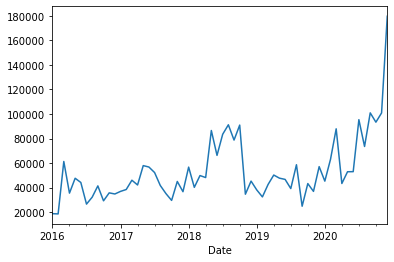

In [4]:
from matplotlib import pyplot
series.plot()
pyplot.show()

## Line graph ( year by year)

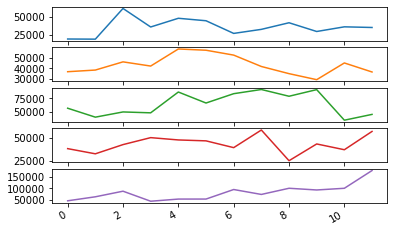

In [5]:
from pandas import Grouper
groups = series.groupby(Grouper(freq='A')) 
years = DataFrame()
for name, group in groups:
  years[name.year] = group.values
years.plot(subplots=True, legend=False)
pyplot.show()

## Boxplot for each year 

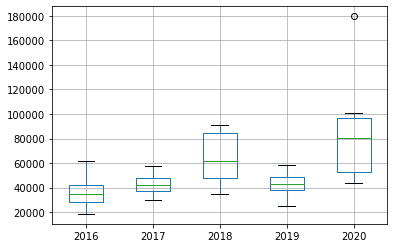

In [6]:
for name, group in groups:
  years[name.year] = group.values
years.boxplot()
pyplot.show()

# Data Analysis

## Time Series Decomposition

Date
2016-01-01             NaN
2016-02-01             NaN
2016-03-01             NaN
2016-04-01             NaN
2016-05-01             NaN
2016-06-01             NaN
2016-07-01    36209.186250
2016-08-01    37795.830833
2016-09-01    37988.737917
2016-10-01    37629.429167
2016-11-01    38336.128333
2016-12-01    39290.676667
2017-01-01    40886.785000
2017-02-01    42356.653333
2017-03-01    42494.240000
2017-04-01    42247.372083
2017-05-01    42648.870000
2017-06-01    43113.662917
2017-07-01    44015.053333
2017-08-01    44912.589583
2017-09-01    45144.347083
2017-10-01    45554.613333
2017-11-01    46999.007083
2017-12-01    48587.297083
2018-01-01    50283.725833
2018-02-01    53644.921667
2018-03-01    57523.387500
2018-04-01    61899.934167
2018-05-01    64025.634167
2018-06-01    63952.834167
2018-07-01    63539.271667
2018-08-01    62440.603750
2018-09-01    61813.499583
2018-10-01    61596.455417
2018-11-01    60062.834583
2018-12-01    57627.892500
2019-01-01    54967.738

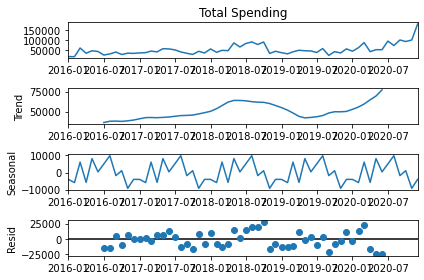

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose 
from pandas import read_csv
series = read_csv("/Users/anandlow/Documents/Vitrox WBL /AI/Part Consumption Prediction/MVSS_spending.csv", header = 0, index_col = 0, parse_dates = True, squeeze = True)

result = seasonal_decompose(series, model='additive') 
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

from matplotlib import pyplot

result.plot()
pyplot.show()

## Lag Scatter Plot  

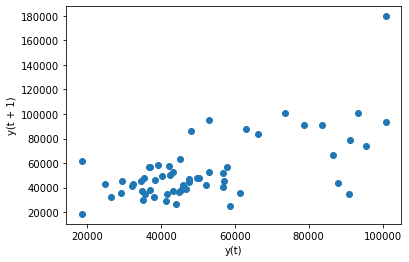

In [18]:
from pandas.plotting import lag_plot

lag_plot(series)
pyplot.show()

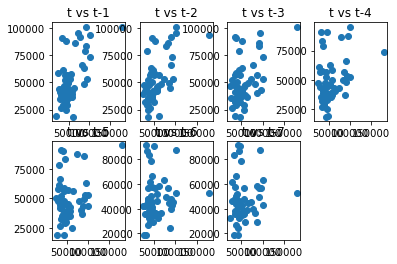

In [19]:
values = DataFrame(series.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
  columns.append(values.shift(i))
dataframe = concat(columns, axis=1) 
columns = ['t']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i)) 
dataframe.columns = columns 
pyplot.figure(1)
for i in range(1,(lags + 1)):
    ax = pyplot.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    pyplot.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
pyplot.show()

# Baseline Forecast Model

## Create lag feature

In [7]:
from pandas import concat

temps = DataFrame(series.values)
dataframe = concat([temps.shift(1), temps], axis=1) 
dataframe.columns = ['t', 't+1'] 
print(dataframe.head(5))

          t       t+1
0       NaN  18715.61
1  18715.61  18522.58
2  18522.58  61265.20
3  61265.20  35471.46
4  35471.46  47591.26


## Create training and test sets

In [8]:
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.50)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

50 % of the dataset will be used as training dataset, 50% will be used as test dataset. The first row of data with the NaN value will be excluded because it cannot be used in our model. 

## Persistence Algorithm

In [9]:
# persistence model
def model_persistence(x):
  return x

## Make and Evaluate Forecast

In [10]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 25215.495


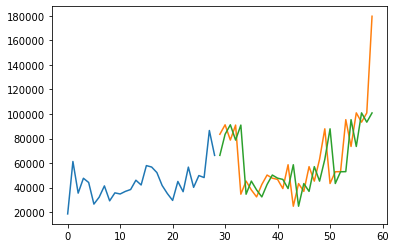

In [11]:
# plot predictions and expected results
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y]) 
pyplot.plot([None for i in train_y] + [x for x in predictions]) 
pyplot.show()

Training Set (Blue), Test Set (Orange) and Prediction(Green). The persistence algorithm is naive. It is often called the naive forecast. It assumes nothing about the specifics of the time series problem to which it is applied. This is what makes it so easy to understand and so quick to implement and evaluate.

# ARIMA

## Convert non-stationary data to stationary data

In [12]:
# statistical test for the stationarity of the time series
from pandas import read_csv
from pandas import Series
from statsmodels.tsa.stattools import adfuller
# create a differenced time series
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return Series(diff)

series = read_csv("/Users/anandlow/Documents/Vitrox WBL /AI/Part Consumption Prediction/MVSS_spending.csv", header = 0, index_col = 0, parse_dates = True, squeeze = True)
X = series.values
# difference data
stationary = difference(X)
stationary.index = series.index[1:]
# check if stationary
result = adfuller(stationary) 
print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1]) 
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value)) # save
stationary.to_csv('stationary.csv', header=False)

ADF Statistic: -10.929580
p-value: 0.000000
Critical Values:
	1%: -3.548
	5%: -2.913
	10%: -2.594


The results show that the test statistic value -10.929580 is smaller than the critical value at 5% of -2.913. This suggests that we can reject the null hypothesis with a significance level of less than 5% (i.e. a low probability that the result is a statistical fluke). Rejecting the null hypothesis means that the process has no unit root, and in turn that the 1-lag differenced time series is stationary or does not have time-dependent structure.

This suggests that at least one level of differencing is required. The d parameter in our ARIMA model should at least be a value of 1.

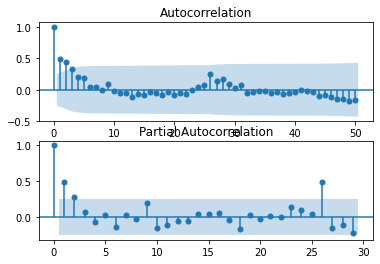

In [13]:
# ACF and PACF plots of time series
from pandas import read_csv
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
series = read_csv("/Users/anandlow/Documents/Vitrox WBL /AI/Part Consumption Prediction/MVSS_spending.csv", header = 0, index_col = 0, parse_dates = True, squeeze = True)
pyplot.figure()
pyplot.subplot(211)
plot_acf(series, lags=50, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(series, lags=29, ax=pyplot.gca())
pyplot.show()


ACF is an auto-correlation function which gives us values of auto-correlation of observations with its lagged values. We plot these values along with the confidence band. To put it simply, it describes how well the present value of the series is relatied with its past values (lagged values). ACF also consideres time series components like trend, seasonality, cyclic and residual. 

PACF is a partial auto-correlation function. It finds correlation of the residual ( remains after removing the effects which are already explained by the earlier lags) with the next lag value. This models any hidden information in the relationship between residual and the next lag. 

- The ACF shows a significant lag for 3 months. 
- The PACF shows a significant lag for roughly 2 months. 
- Both the ACF and PACF show a drop-off at the same point, perhaps suggesting a mix of AR and MA.

Therefore, a good starting point for p and q values are 3 and 2 respectively. 



This quick analysis suggests an ARIMA(3,1,2) on the raw data may be a good starting point. Experimentation shows that this configuration of ARIMA does not converge and results in errors by the underlying library, as do similarly large AR values. Some experimentation shows that the model does not appear to be stable, with non-zero AR and MA orders defined at the same time. The model can be simplified to ARIMA(0,1,2). 

>Predicted=57198.426, Expected=83451.047
>Predicted=81569.588, Expected=91179.109
>Predicted=90372.494, Expected=78724.023
>Predicted=88406.981, Expected=90943.047
>Predicted=89430.117, Expected=34589.602
>Predicted=60008.907, Expected=45279.500
>Predicted=29561.228, Expected=38099.000
>Predicted=33289.066, Expected=32391.500
>Predicted=35026.477, Expected=42537.730
>Predicted=40616.774, Expected=50212.852
>Predicted=50453.089, Expected=47669.199
>Predicted=53019.031, Expected=46665.148
>Predicted=48926.231, Expected=39193.250
>Predicted=41079.463, Expected=58613.000
>Predicted=50089.285, Expected=24791.029
>Predicted=41458.816, Expected=43253.461
>Predicted=34183.558, Expected=36889.719
>Predicted=37102.952, Expected=57060.711
>Predicted=50898.386, Expected=45250.621
>Predicted=55175.086, Expected=63008.078
>Predicted=59076.111, Expected=87893.812
>Predicted=80118.170, Expected=43319.809
>Predicted=72465.163, Expected=52895.520
>Predicted=50404.017, Expected=52976.262
>Predicted=47912

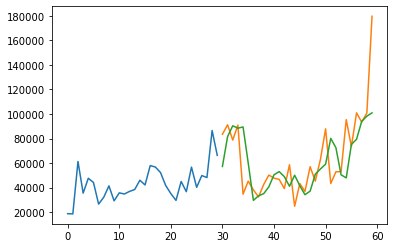

In [16]:
# evaluate manually configured ARIMA model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

# load data
series = read_csv("/Users/anandlow/Documents/Vitrox WBL /AI/Part Consumption Prediction/MVSS_spending.csv", header = 0, index_col = 0, parse_dates = True, squeeze = True) # prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(0,1,2))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

# plot predictions and expected results
pyplot.plot(train)
pyplot.plot([None for i in train] + [x for x in test]) 
pyplot.plot([None for i in train] + [x for x in predictions]) 
pyplot.show()

The RMSE improved considerably compared to our baseline persistence model. The root mean squared error is decreased from 25215.495 to 24127.626. We can get further improved results if we configured the ARIMA model better. 

## Grid Search ARIMA Hyperparameters

we will search values of p, d, and q for combinations that do not result in error, and find the combination that results in the best performance. We will use a grid search to explore all combinations in a subset of integer values. We will search all combinations of the following parameters:
- p: 0 to 12
- d: 0 to 3
- q: 0 to 12




In [15]:
# grid search ARIMA parameters for time series
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order): # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values): 
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order 
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# load dataset
series = read_csv("/Users/anandlow/Documents/Vitrox WBL /AI/Part Consumption Prediction/MVSS_spending.csv", header = 0, index_col = 0, parse_dates = True, squeeze = True) # evaluate parameters
p_values = range(0,13)
d_values = range(0, 4)
q_values = range(0, 13)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=34989.269
ARIMA(0, 0, 1) RMSE=31198.606
ARIMA(0, 0, 2) RMSE=28817.502
ARIMA(0, 0, 3) RMSE=27929.173
ARIMA(0, 0, 4) RMSE=27653.759
ARIMA(0, 0, 5) RMSE=28099.747
ARIMA(0, 0, 6) RMSE=29064.465
ARIMA(0, 0, 7) RMSE=28971.500
ARIMA(0, 0, 8) RMSE=30658.933
ARIMA(0, 0, 9) RMSE=31689.910
ARIMA(0, 1, 0) RMSE=25245.211
ARIMA(0, 1, 1) RMSE=24518.237
ARIMA(0, 1, 2) RMSE=24127.626
ARIMA(0, 2, 0) RMSE=39016.043
ARIMA(1, 0, 0) RMSE=27205.577
ARIMA(1, 0, 2) RMSE=26215.296
ARIMA(1, 0, 3) RMSE=25669.052
ARIMA(1, 1, 0) RMSE=23406.686
ARIMA(1, 1, 1) RMSE=23550.586
ARIMA(1, 2, 0) RMSE=28591.417
ARIMA(1, 2, 1) RMSE=24123.558
ARIMA(2, 0, 0) RMSE=24898.488
ARIMA(2, 1, 0) RMSE=23610.338
ARIMA(2, 1, 1) RMSE=24136.897
ARIMA(2, 2, 0) RMSE=26361.959
ARIMA(3, 0, 0) RMSE=25434.694
ARIMA(3, 1, 0) RMSE=24059.804
ARIMA(3, 2, 0) RMSE=26534.379
ARIMA(4, 0, 0) RMSE=25843.601
ARIMA(4, 1, 0) RMSE=24229.194
ARIMA(4, 2, 0) RMSE=26070.312
ARIMA(5, 0, 0) RMSE=26070.306
ARIMA(5, 1, 0) RMSE=25456.166
ARIMA(6, 0

>Predicted=80041.259, Expected=83451.047
>Predicted=77198.027, Expected=91179.109
>Predicted=90684.612, Expected=78724.023
>Predicted=88405.332, Expected=90943.047
>Predicted=87689.481, Expected=34589.602
>Predicted=69668.811, Expected=45279.500
>Predicted=41306.440, Expected=38099.000
>Predicted=42386.821, Expected=32391.500
>Predicted=35656.807, Expected=42537.730
>Predicted=38620.594, Expected=50212.852
>Predicted=47819.139, Expected=47669.199
>Predicted=49888.037, Expected=46665.148
>Predicted=48116.980, Expected=39193.250
>Predicted=43414.126, Expected=58613.000
>Predicted=50747.049, Expected=24791.029
>Predicted=42536.503, Expected=43253.461
>Predicted=34502.820, Expected=36889.719
>Predicted=40791.277, Expected=57060.711
>Predicted=47750.717, Expected=45250.621
>Predicted=52352.540, Expected=63008.078
>Predicted=54886.586, Expected=87893.812
>Predicted=77649.409, Expected=43319.809
>Predicted=68671.741, Expected=52895.520
>Predicted=49043.563, Expected=52976.262
>Predicted=53903

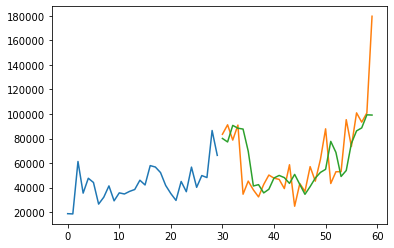

In [17]:
# evaluate manually configured ARIMA model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

# load data
series = read_csv("/Users/anandlow/Documents/Vitrox WBL /AI/Part Consumption Prediction/MVSS_spending.csv", header = 0, index_col = 0, parse_dates = True, squeeze = True) # prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

# plot predictions and expected results
pyplot.plot(train)
pyplot.plot([None for i in train] + [x for x in test]) 
pyplot.plot([None for i in train] + [x for x in predictions]) 
pyplot.show()